### Predicting wine quality using ensemble techniques
- Adaboost Classifier
- GradientBoost Classifier
- XGBoost Classifier

#### Activities
- Data pre-processing
- EDA,FE
- Model Building
- Accuracy score
- Hyperparameter tuning

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Basic Analysis

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.shape

(1599, 12)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
# null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
#duplicate values
data.duplicated().sum()

240

In [22]:
#there are 240 duplicate values which we need to remove
data.drop(index=data[data.duplicated()].index,inplace=True)
data.shape

(1359, 12)

In [24]:
#continuous and discreet variables
discreet_var=[features for features in data.columns if len(data[features].unique())<25]
print(discreet_var)
cont_var=[features for features in data.columns if features not in discreet_var]
print(cont_var)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [27]:
#checking number of unique features
for features in data.columns:
    print(f'{features} has {len(data[features].unique())} unique features')

fixed acidity has 96 unique features
volatile acidity has 143 unique features
citric acid has 80 unique features
residual sugar has 91 unique features
chlorides has 153 unique features
free sulfur dioxide has 60 unique features
total sulfur dioxide has 144 unique features
density has 436 unique features
pH has 89 unique features
sulphates has 96 unique features
alcohol has 65 unique features
quality has 6 unique features


#### Graphical Analysis

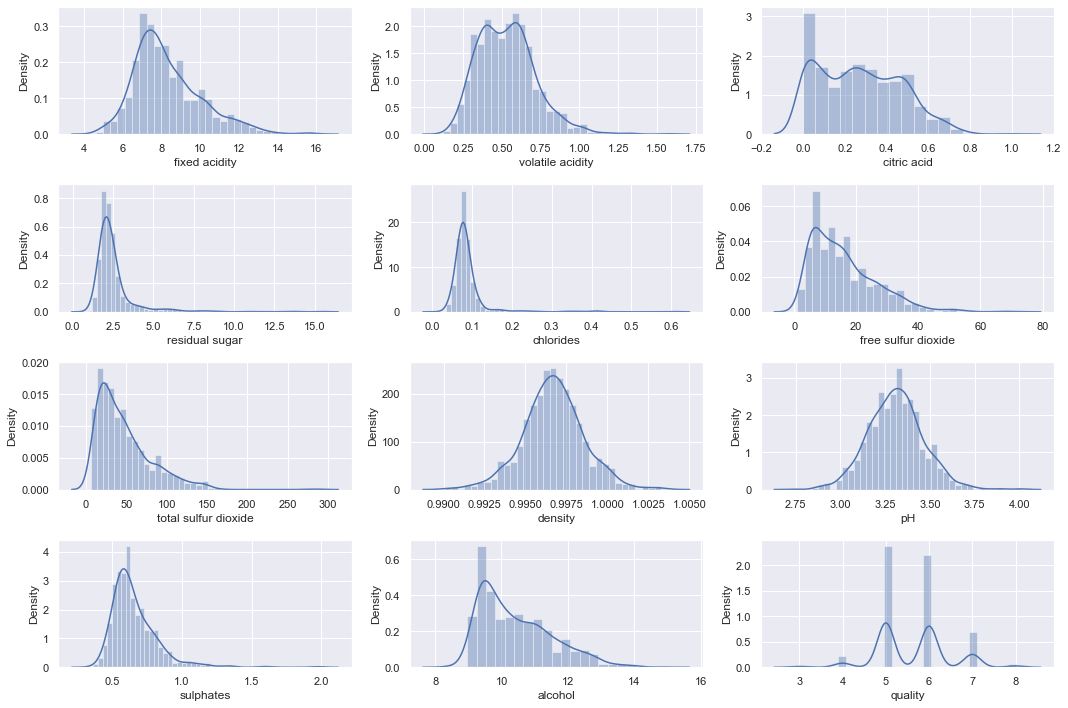

In [28]:
## checking distribution of the dataset
sns.set(rc={'figure.figsize':(15,10)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.distplot(data[features],kde=True,color='b')
    pn+=1
    plt.xlabel(features)
    plt.tight_layout()

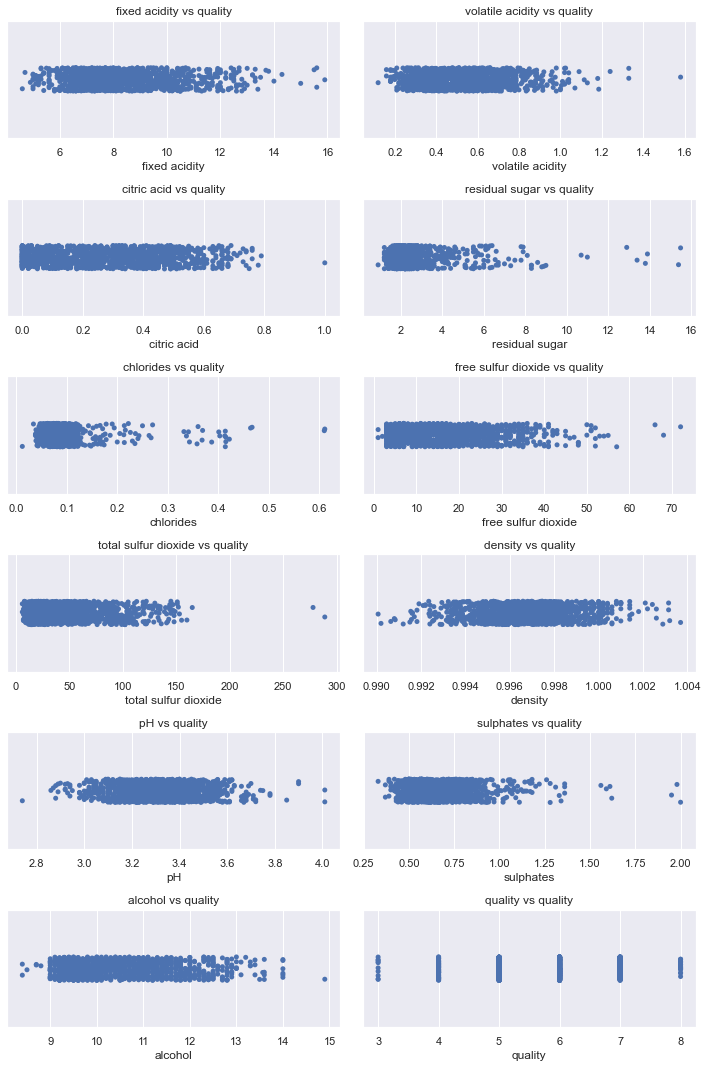

In [34]:
## Comparing the features against target feature 'quality'
sns.set(rc={'figure.figsize':(10,15)})
pn=1
for features in data:
    plt.subplot(6,2,pn)
    sns.stripplot(data[features],hue=data['quality'],color='b')
    pn+=1
    plt.title(f'{features} vs quality')
    plt.xlabel(features)
    plt.tight_layout()

In [33]:
#Correlation
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

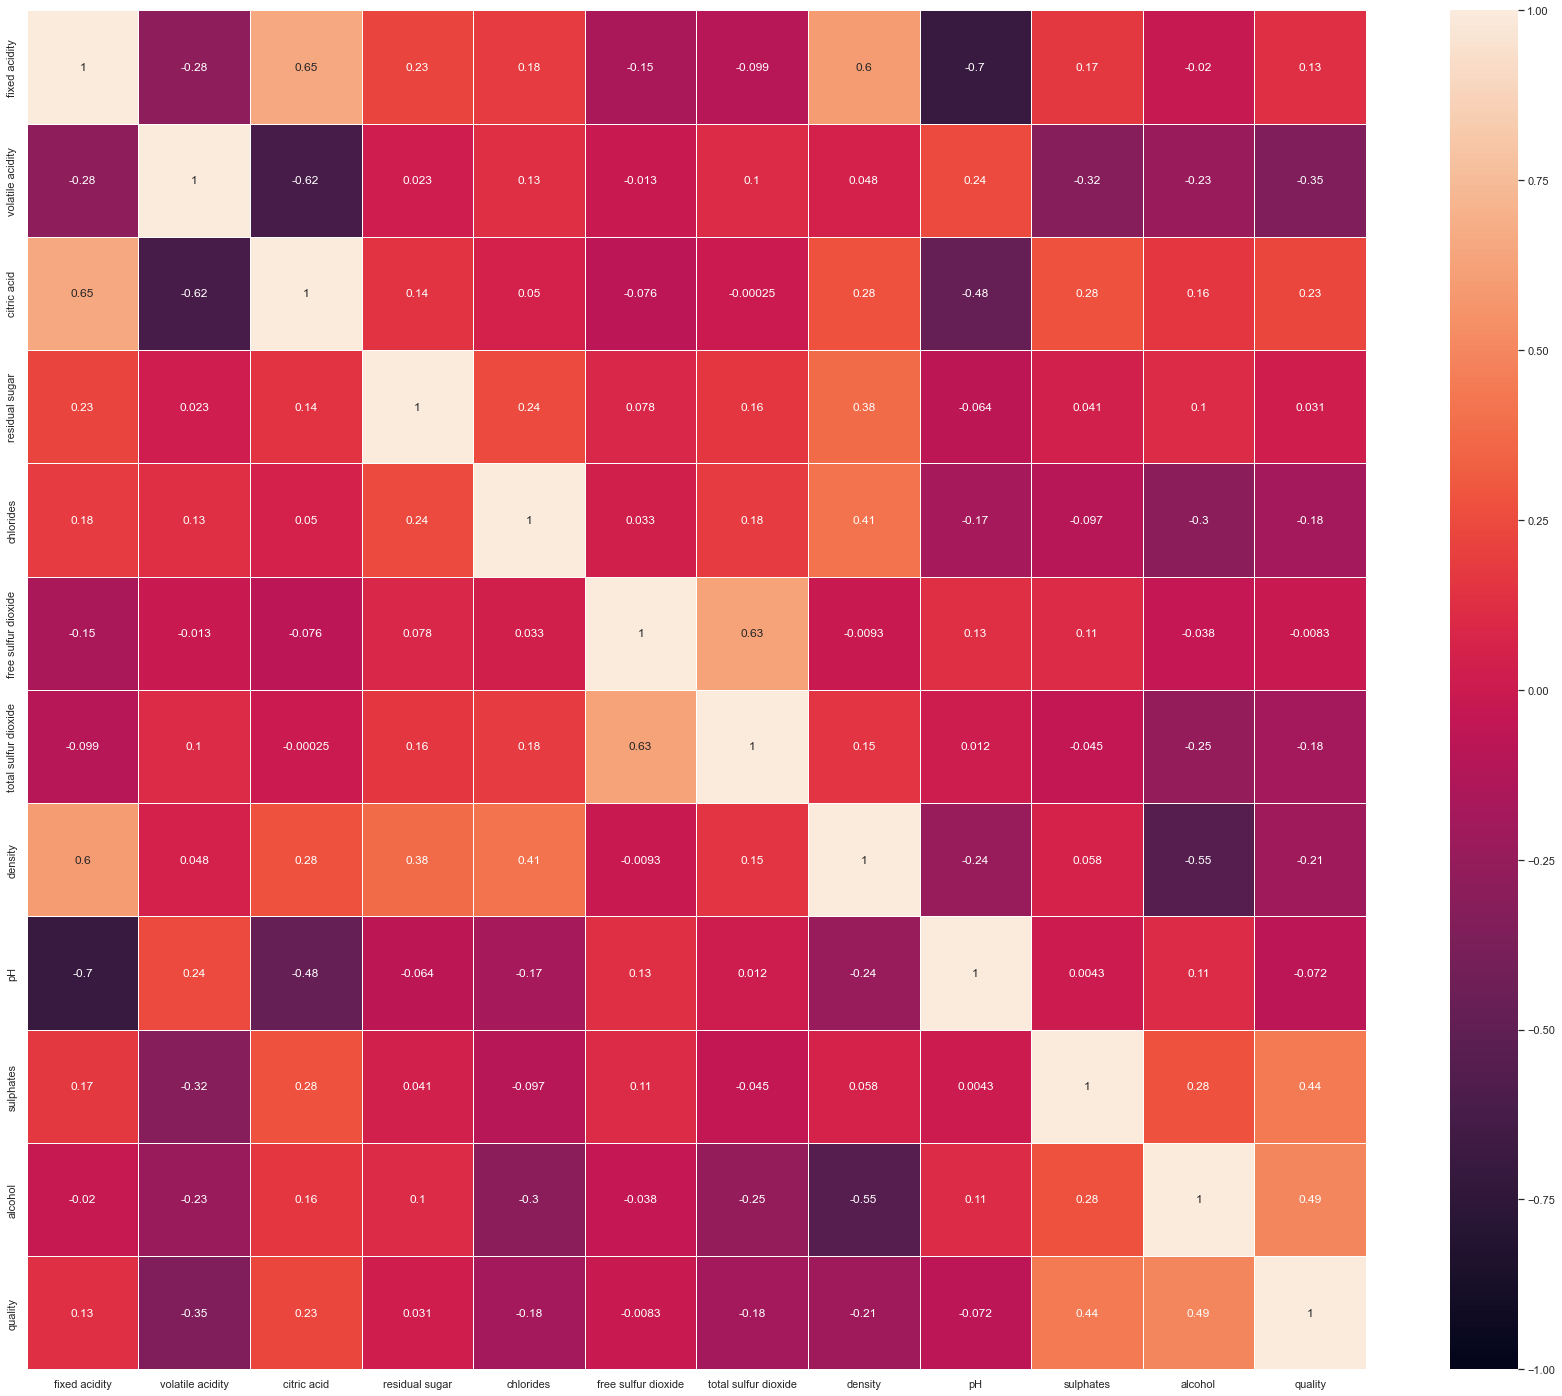

In [46]:
#visualising the correlation using heatmap
sns.heatmap(data=data.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.5)

#### Outliers Handling

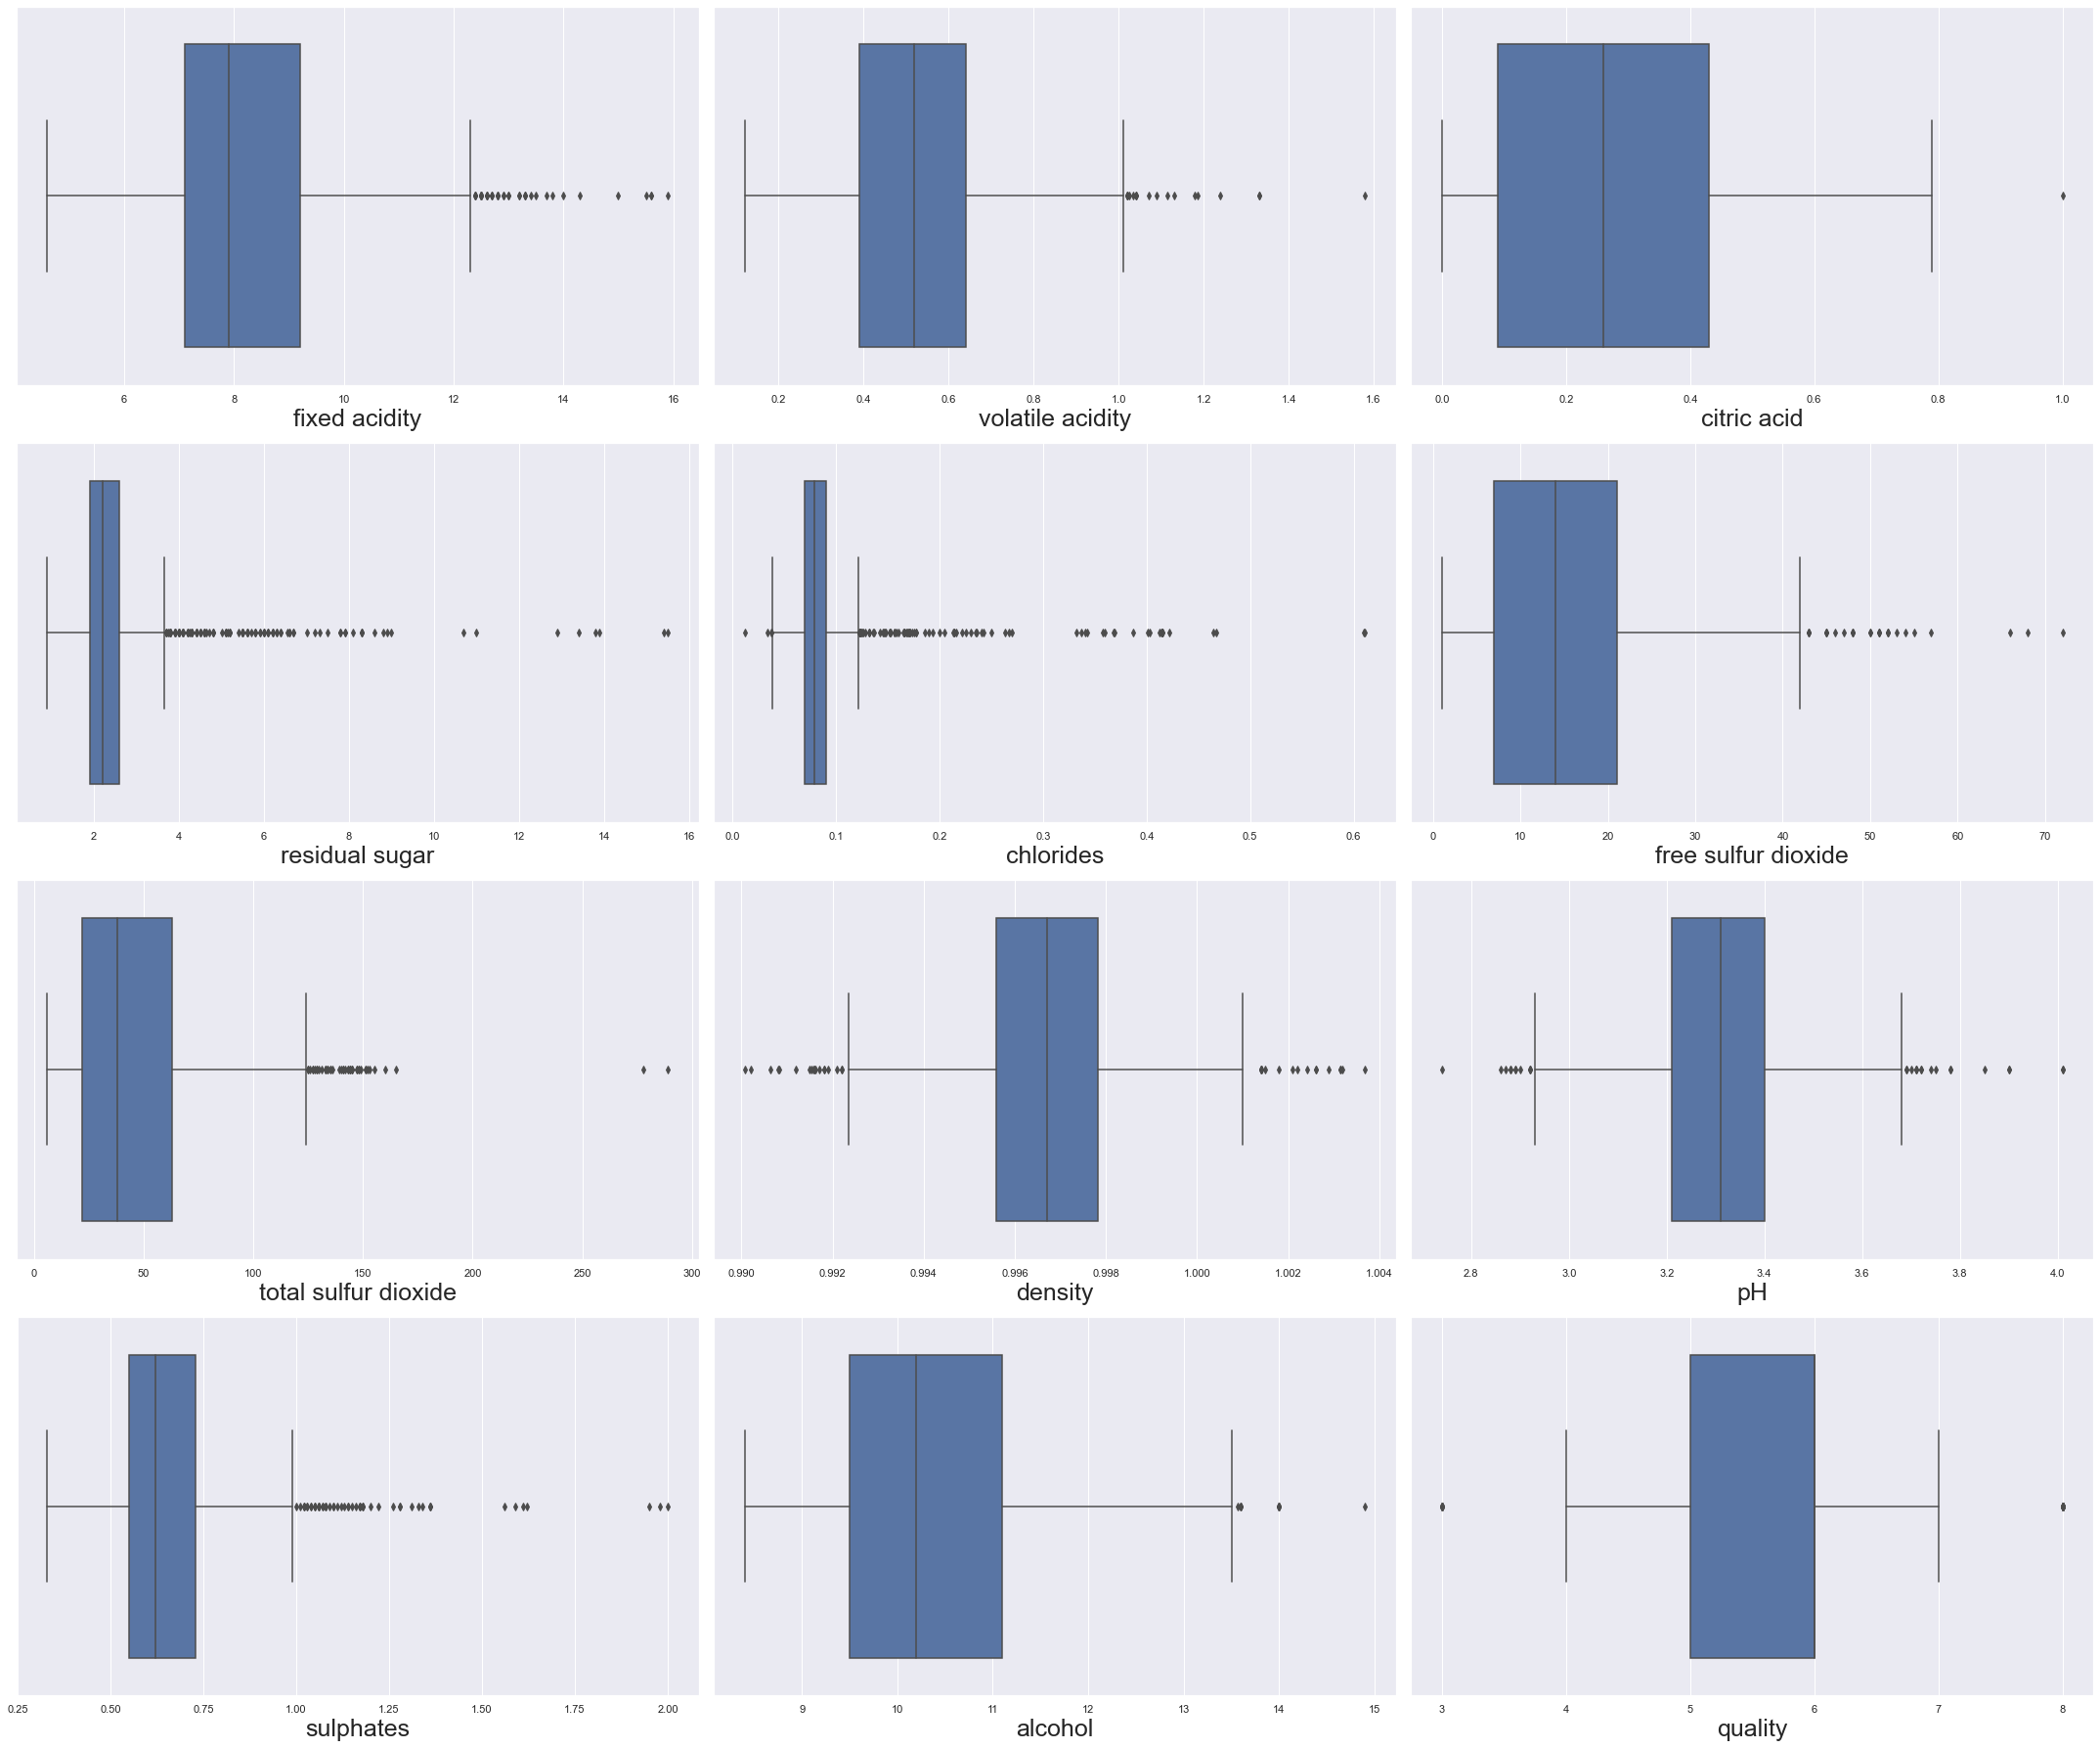

In [36]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

In [40]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)|(data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [41]:
#data.columns
data1=data.copy()

In [42]:
for features in data.columns:
    outlier_handling(features)

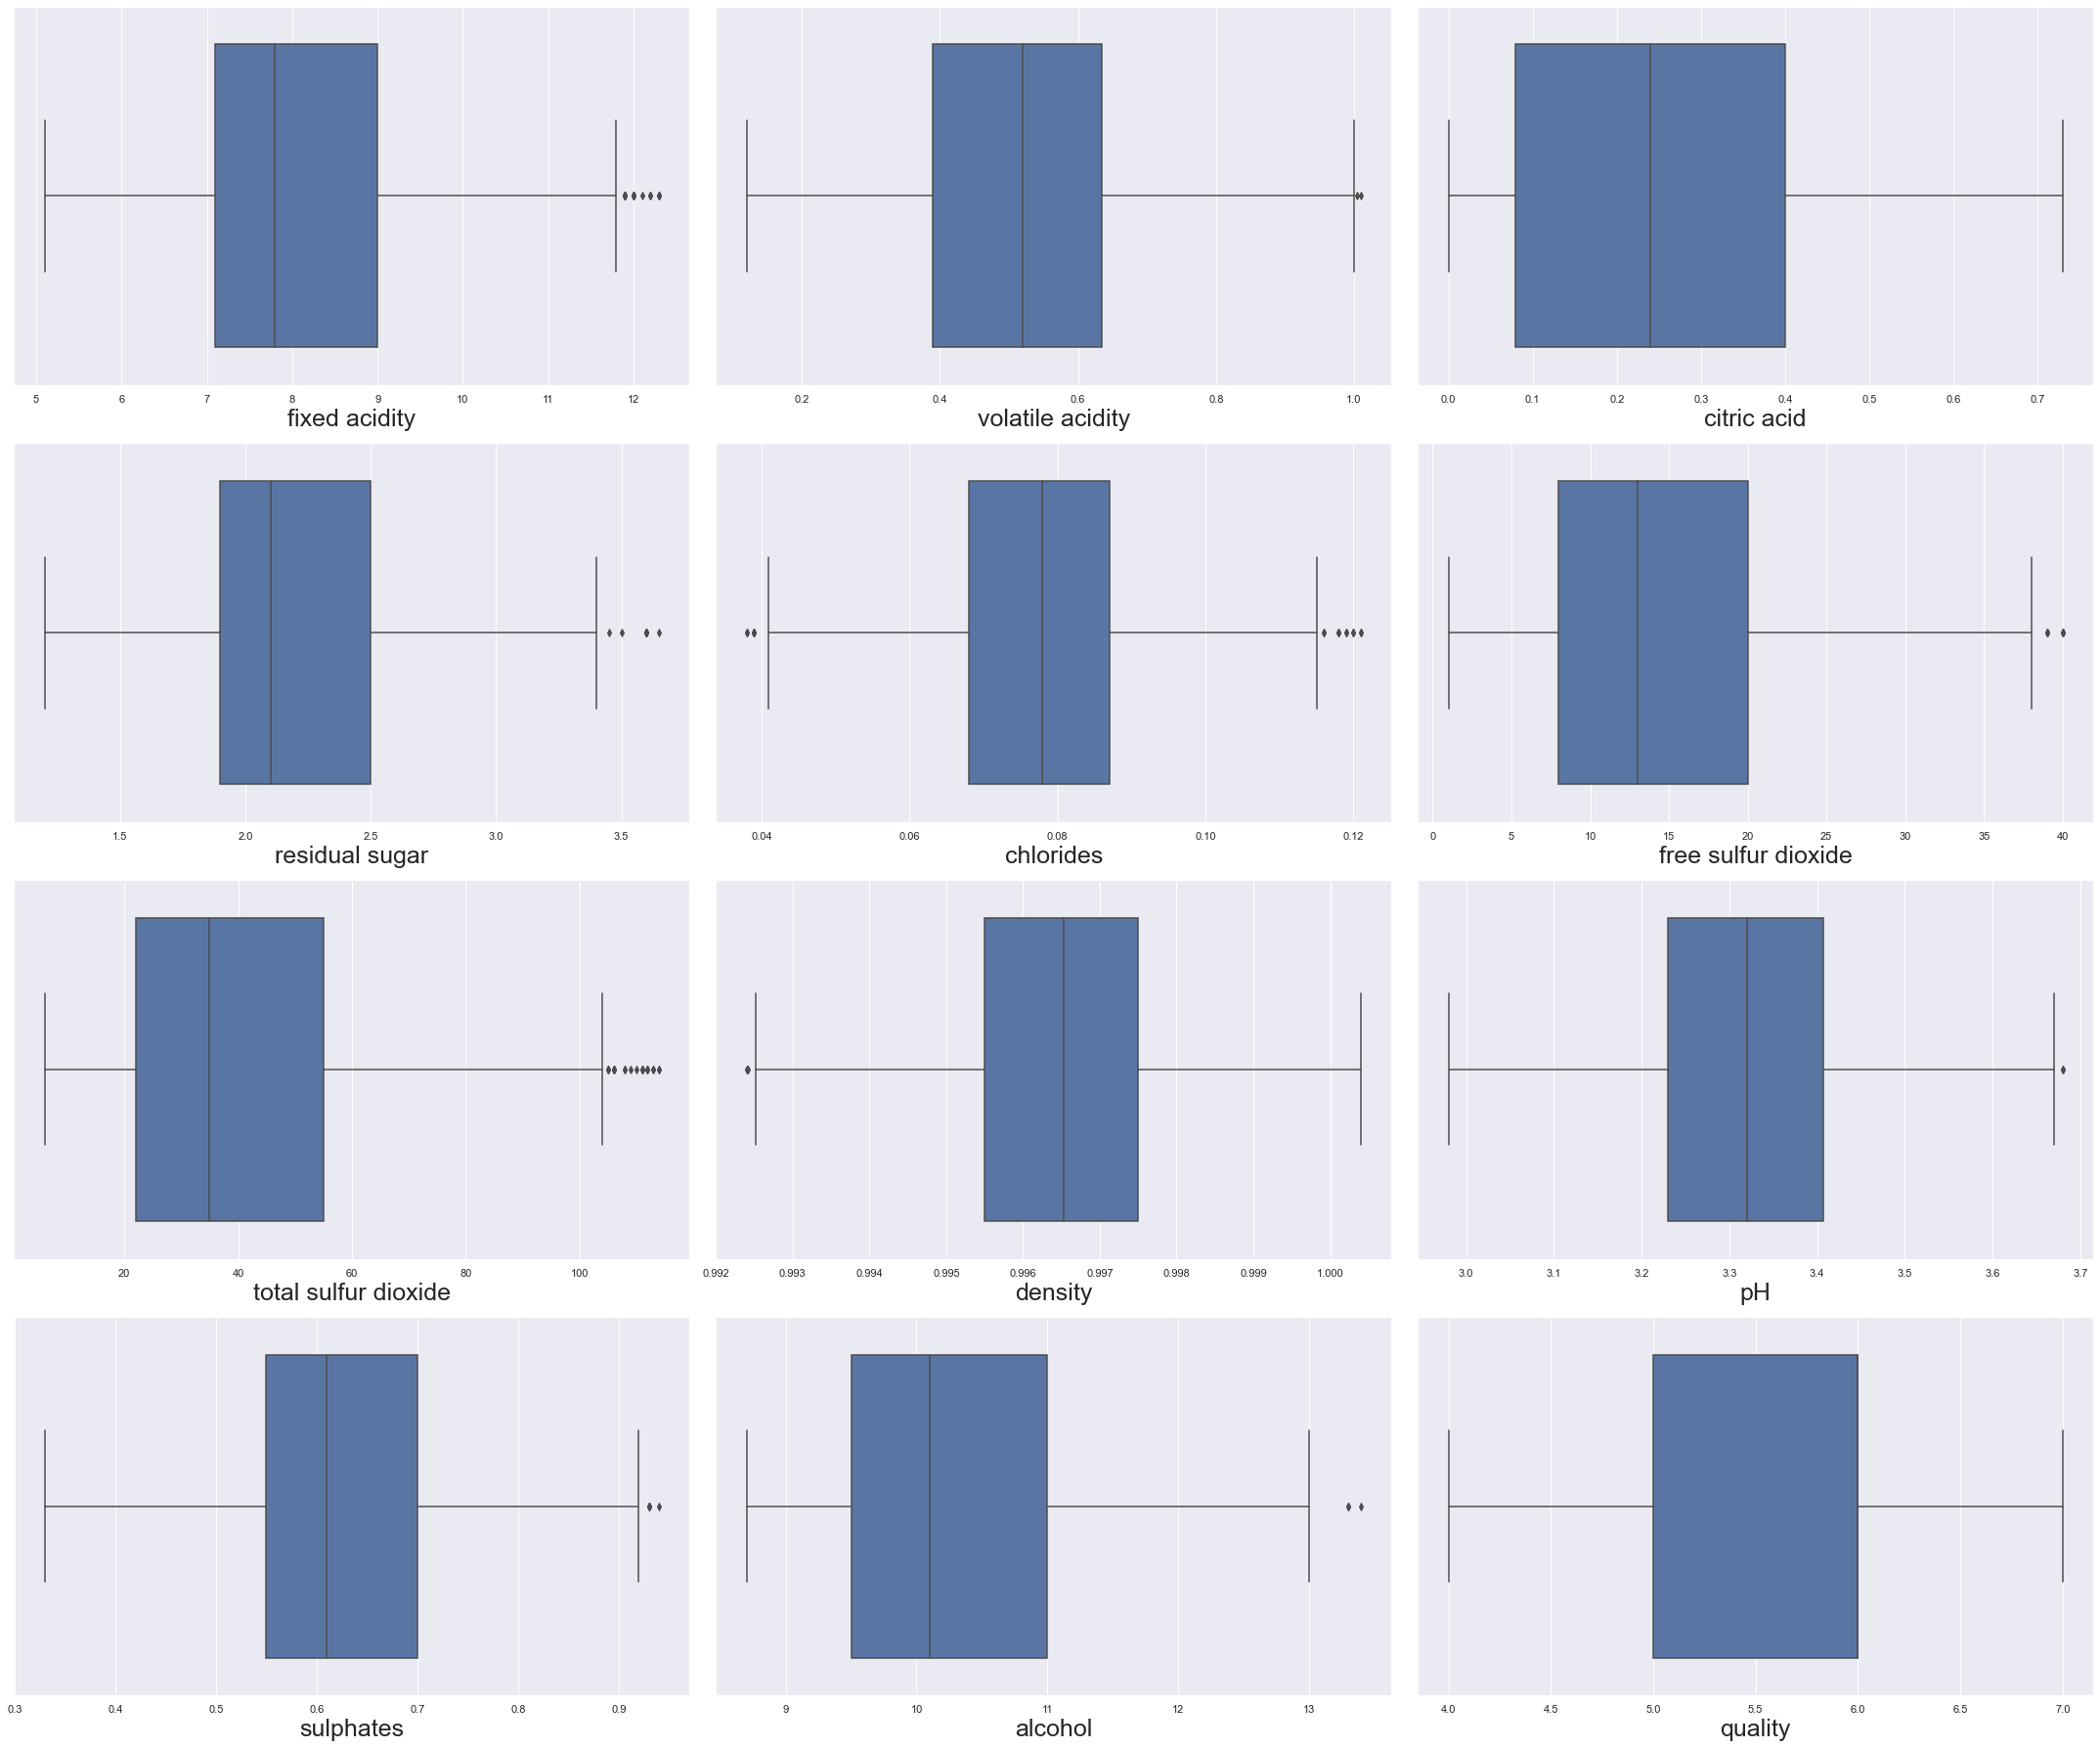

In [43]:
## checking the outliers status after handling them
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

#### Data Pre-processing

In [48]:
X=data.drop('quality',axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [49]:
y=data['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [50]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=40)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
284,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8
230,5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
1518,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
179,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
...,...,...,...,...,...,...,...,...,...,...,...
760,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7
262,8.0,0.52,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
360,8.2,0.70,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4


#### Model Building

In [51]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [52]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [53]:
adaboost_pred=adaboost.predict(X_test)

In [56]:
##Accuracy score
from sklearn.metrics import accuracy_score
print(f'Training accuracy score of the AdaBoost model is {round(adaboost.score(X_train,y_train)*100.00,3)}')
print(f'Test accuracy score of the AdaBoost model is {round(accuracy_score(y_test,adaboost_pred)*100.00,3)}')

Training accuracy score of the AdaBoost model is 51.074
Test accuracy score of the AdaBoost model is 50.311


In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
ada_conf_mat=confusion_matrix(y_test,adaboost_pred)
ada_conf_mat

array([[ 1,  5,  1,  0],
       [17, 83, 40,  7],
       [ 9, 44, 55, 28],
       [ 0,  1,  8, 23]], dtype=int64)

In [59]:
#Classification Report
from sklearn.metrics import classification_report
ada_classif_report=classification_report(y_test,adaboost_pred)
print(ada_classif_report)

              precision    recall  f1-score   support

           4       0.04      0.14      0.06         7
           5       0.62      0.56      0.59       147
           6       0.53      0.40      0.46       136
           7       0.40      0.72      0.51        32

    accuracy                           0.50       322
   macro avg       0.40      0.46      0.41       322
weighted avg       0.55      0.50      0.52       322



In [60]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_param={
            'n_estimators' : [5, 10, 15],
 'learning_rate' : [0.001,0.01,0.1,1.0],
 'algorithm' : ['SAMME', 'SAMME.R']
    }

In [61]:
grid_search=GridSearchCV(estimator=adaboost,param_grid=grid_param,verbose=2, n_jobs=-1, cv=3)

In [62]:
grid_search_ada=grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [63]:
grid_search_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 15}

In [64]:
ada_best_param=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=15)

In [65]:
ada_best_param.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=15)

In [66]:
ada_best_param_predict=ada_best_param.predict(X_test)

In [67]:
##Accuracy score of the AdaBoost model with best parameters
from sklearn.metrics import accuracy_score
print(f'Training accuracy score of the AdaBoost model with best parameters is {round(ada_best_param.score(X_train,y_train)*100.00,3)}')
print(f'Test accuracy score of the AdaBoost model with best parameters is {round(accuracy_score(y_test,ada_best_param_predict)*100.00,3)}')

Training accuracy score of the AdaBoost model with best parameters is 61.35
Test accuracy score of the AdaBoost model with best parameters is 54.348


In [68]:
#Confusion Matrix
ada_best_param_conf_mat=confusion_matrix(y_test,ada_best_param_predict)
ada_best_param_conf_mat

array([[ 1,  4,  2,  0],
       [ 0, 87, 57,  3],
       [ 0, 40, 72, 24],
       [ 0,  0, 17, 15]], dtype=int64)

In [69]:
# Classification Report
ada_best_param_classif_report=classification_report(y_test,ada_best_param_predict)
print(ada_best_param_classif_report)

              precision    recall  f1-score   support

           4       1.00      0.14      0.25         7
           5       0.66      0.59      0.63       147
           6       0.49      0.53      0.51       136
           7       0.36      0.47      0.41        32

    accuracy                           0.54       322
   macro avg       0.63      0.43      0.45       322
weighted avg       0.57      0.54      0.55       322



In [70]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [71]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [72]:
gb_pred=gb.predict(X_test)

In [73]:
#Accuracy score
print(f'Training accuracy score of the GradientBoostingClassifier model is {round(gb.score(X_train,y_train)*100.00,3)}')
print(f'Test accuracy score of the GradientBoostingClassifier model is {round(accuracy_score(y_test,gb_pred)*100.00,3)}')

Training accuracy score of the GradientBoostingClassifier model is 93.252
Test accuracy score of the GradientBoostingClassifier model is 59.006


In [74]:
#Confusion Matrix
gb_conf_mat=confusion_matrix(y_test,gb_pred)
gb_conf_mat

array([[ 0,  6,  1,  0],
       [ 2, 92, 50,  3],
       [ 1, 41, 83, 11],
       [ 1,  1, 15, 15]], dtype=int64)

In [75]:
#Classification Report
gb_classif_report=classification_report(y_test,gb_pred)
print(gb_classif_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.66      0.63      0.64       147
           6       0.56      0.61      0.58       136
           7       0.52      0.47      0.49        32

    accuracy                           0.59       322
   macro avg       0.43      0.43      0.43       322
weighted avg       0.59      0.59      0.59       322



In [76]:
#Hyperparameter tuning
grid_param={
            "learning_rate":[0.01,0.001,0.1],
 "n_estimators" : [10,20,30],
 'max_depth' : range(2,10,1),
 'min_samples_leaf' : range(1,5,1),
 'min_samples_split': range(2,10,1),
 'max_features' : ['auto','log2']
    }

In [85]:
grid_search=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid={
            "learning_rate":[0.01,0.001,0.1],
 "n_estimators" : [10,20,30],
 'max_depth' : range(2,10,1),
 'min_samples_leaf' : range(1,5,1),
 'min_samples_split': range(2,10,1),
 'max_features' : ['auto','log2']
    },verbose=2, n_jobs=-1, cv=2)

In [86]:
grid_search_gb=grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 4608 candidates, totalling 9216 fits


In [87]:
grid_search_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 20}

In [90]:
gb_best_params=GradientBoostingClassifier(learning_rate= 0.1,
 max_depth= 8,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 8,
 n_estimators= 20)

In [91]:
gb_best_params.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, max_features='log2',
                           min_samples_split=8, n_estimators=20)

In [92]:
gb_best_params_pred=gb_best_params.predict(X_test)

In [93]:
##Accuracy score of the GradientBoostingClassifier model with best parameters
print(f'Training accuracy score of the GradientBoostingClassifier model with best parameters is {round(gb_best_params.score(X_train,y_train)*100.00,3)}')
print(f'Test accuracy score of the GradientBoostingClassifier model with best parameters is {round(accuracy_score(y_test,gb_best_params_pred)*100.00,3)}')

Training accuracy score of the GradientBoostingClassifier model with best parameters is 100.0
Test accuracy score of the GradientBoostingClassifier model with best parameters is 63.043


In [94]:
#Confusion Matrix
gb_best_param_conf_mat=confusion_matrix(y_test,gb_best_params_pred)
gb_best_param_conf_mat

array([[ 0,  6,  1,  0],
       [ 3, 98, 45,  1],
       [ 2, 35, 91,  8],
       [ 0,  2, 16, 14]], dtype=int64)

In [95]:
#Classification Report
gb_best_param_classif_report=classification_report(y_test,gb_best_params_pred)
print(gb_best_param_classif_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.70      0.67      0.68       147
           6       0.59      0.67      0.63       136
           7       0.61      0.44      0.51        32

    accuracy                           0.63       322
   macro avg       0.47      0.44      0.45       322
weighted avg       0.63      0.63      0.63       322



In [96]:
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 89.1/89.1 MB 718.6 kB/s eta 0:00:00


In [106]:
#XGBoost Classifier
import xgboost

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [109]:
xgb=xgboost.()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [111]:
xgb_pred=xgb.predict(X_test)

In [114]:
#Accuracy score
print(f'Training accuracy score of the XGBoostClassifier model is {round(xgb.score(X_train,y_train)*100.00,3)}')
print(f'Test accuracy score of the XGBoostClassifier model is {round(accuracy_score(y_test,xgb_pred)*100.00,3)}')

Training accuracy score of the XGBoostClassifier model is 100.0
Test accuracy score of the XGBoostClassifier model is 58.385


### Concusion

- XGBoostClassifier model gives best accuracy